In [1]:
from basic import *
import xarray
import time
import numpy

In [2]:
met10 = tk.getMeteorologyFromU10(u10=2*m/s, inversion = 300*m)

In [137]:
meteorology=met10;minx=0;miny=-25;minz=-15;maxx=100;maxy=25;maxz=15;timeSpan=3*min;dxdy=1*m;dz=1*m;dt=0.5*s;

# Instantaneous

In [138]:
gc = tk.getGasCloud(sourceQ = 1*g, sourceHeight=10*m, initialCloudSize=[1*m,1*m,1*m])

In [139]:
C = gc.getConcentrationFromMinMaxRange_inst(meteorology=meteorology,minx=minx,miny=miny,minz=minz,maxx=maxx,maxy=maxy,maxz=maxz,timeSpan=timeSpan,dxdy=dxdy,dz=dz,dt=dt)

### Integration using error function

In [140]:
D = gc.getDosageFromMinMaxRange_inst(meteorology=meteorology,minx=minx,miny=miny,minz=minz,maxx=maxx,maxy=maxy,maxz=maxz,timeSpan=timeSpan,dxdy=dxdy,dz=dz,dt=dt)

### Integration without using error function (Numerical)

In [141]:
D_NoERF = gc.getDosageFromMinMaxRange_inst_NoERF(meteorology=meteorology,minx=minx,miny=miny,minz=minz,maxx=maxx,maxy=maxy,maxz=maxz,timeSpan=timeSpan,dxdy=dxdy,dz=dz,dt=dt)

### Max concentration over time

In [142]:
conc_x_inst = C.sel(y=0,z=10, method="nearest").max(dim="time")
x_array_inst = conc_x_inst.squeeze().x

Text(0.5, 1.0, 'Maximum concentration over time')

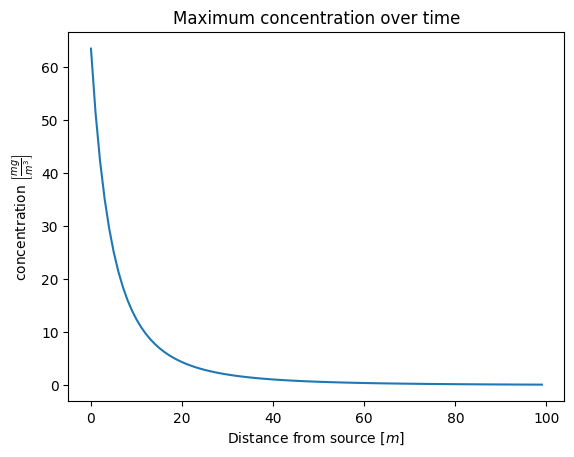

In [143]:
plt.plot(x_array_inst, conc_x_inst)
plt.xlabel("Distance from source $[m]$")
plt.ylabel(r"concentration $\left[\frac{mg}{m^3}\right]$")
plt.title(r"Maximum concentration over time")

## Concentration over time for a fixed point

Text(0.5, 1.0, 'Receptor at $x=30[m]$, $y=0[m]$, $z=10[m]$')

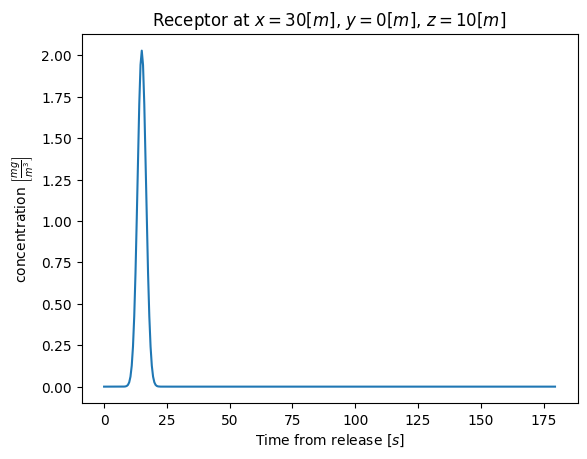

In [144]:
x=30; y=0; z=10;
conc_inst_t = C.sel(x=x,y=y,z=z, method="nearest")
time_array = conc_inst_t.squeeze().time
plt.plot(time_array, conc_inst_t)
plt.xlabel("Time from release $[s]$")
plt.ylabel(r"concentration $\left[\frac{mg}{m^3}\right]$")
plt.title(f"Receptor at $x={x}[m]$, $y={y}[m]$, $z={z}[m]$")

In [145]:
dataForPlot_conc = C.sel(z=4, time = 15)

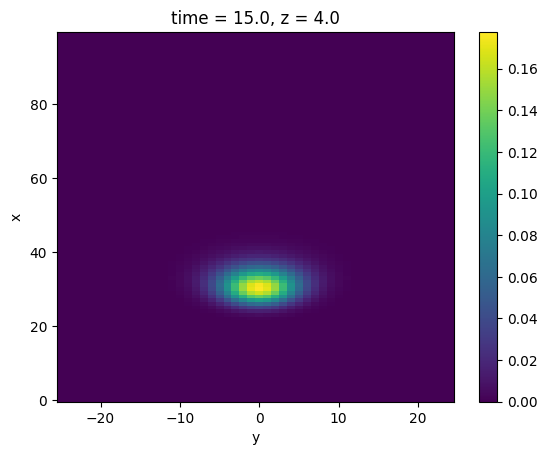

In [146]:
xarray.plot.pcolormesh(dataForPlot_conc)

## Dosage

In [147]:
x=30; y=0; z=10;
dos_x_lastTime = D.sel(y=y,z=z, time=D.time[-1])
dos_x_lastTime_noerf = D_NoERF.sel(y=y,z=z, time=D.time[-1])
x_array = dos_x_lastTime.squeeze().x


Text(0.5, 1.0, 'Maximum Dosage over time')

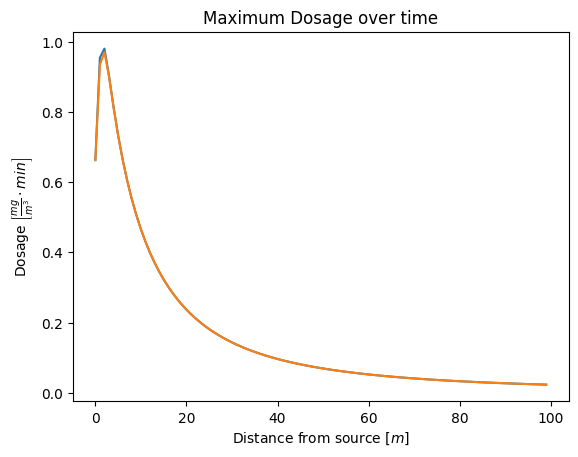

In [148]:
plt.plot(x_array, dos_x_lastTime)
plt.plot(x_array, dos_x_lastTime_noerf)
plt.xlabel("Distance from source $[m]$")
plt.ylabel(r"Dosage $\left[\frac{mg}{m^3}\cdot min\right]$")
plt.title(r"Maximum Dosage over time")

(0.0, 25.0)

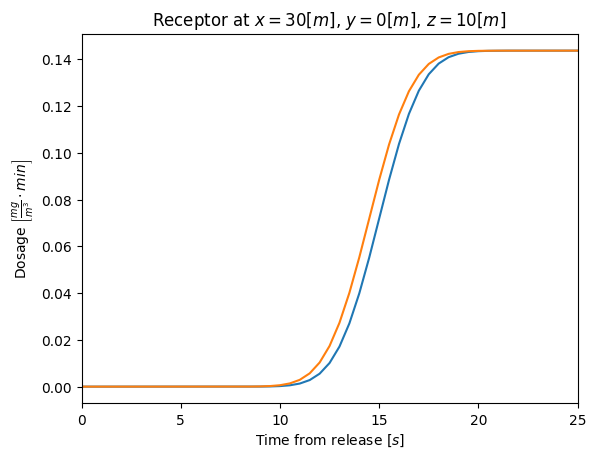

In [149]:
x=30; y=0; z=10;
dos_t = D.sel(x=x,y=y,z=z)
dos_t_noerf = D_NoERF.sel(x=x,y=y,z=z)
t_array = dos_t.squeeze().time
plt.plot(t_array, dos_t)
plt.plot(t_array, dos_t_noerf)
plt.xlabel("Time from release $[s]$")
plt.ylabel(r"Dosage $\left[\frac{mg}{m^3}\cdot min\right]$")
plt.title(f"Receptor at $x={x}[m]$, $y={y}[m]$, $z={z}[m]$")
plt.xlim(0,25)

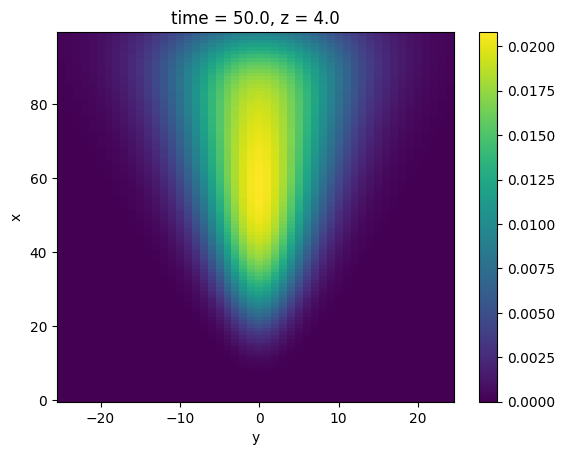

In [150]:
dataForPlot_dos = D.sel(z=4, time = 50)
xarray.plot.pcolormesh(dataForPlot_dos)

# continuous

In [151]:
gc_cont = tk.getGasCloud(sourceQ = 1*g/s, sourceHeight=10*m, initialCloudSize=[1*m,1*m,1*m])

### Concentration is the dosage D of instantneous release, and Dosage is the numerical integration on this concentration

In [ ]:
C_cont = gc_cont.getConcentrationFromMinMaxRange_cont(meteorology=meteorology,minx=minx,miny=miny,minz=minz,maxx=maxx,maxy=maxy,maxz=maxz,timeSpan=timeSpan,dxdy=dxdy,dz=dz,dt=dt)
D_cont_NoErf = gc_cont.getDosageFromMinMaxRange_cont_NoERF(meteorology=meteorology,minx=minx,miny=miny,minz=minz,maxx=maxx,maxy=maxy,maxz=maxz,timeSpan=timeSpan,dxdy=dxdy,dz=dz,dt=dt)

### Concentration is the dosage D_NoERF of instantneous release, and Dosage is the numerical integration on this concentration

In [ ]:
C_cont_NoErf = gc_cont.getConcentrationFromMinMaxRange_cont_NoERF(meteorology=meteorology,minx=minx,miny=miny,minz=minz,maxx=maxx,maxy=maxy,maxz=maxz,timeSpan=timeSpan,dxdy=dxdy,dz=dz,dt=dt)
D_cont_doubleNoErf = gc_cont.getDosageFromMinMaxRange_cont_doubleNoERF(meteorology=meteorology,minx=minx,miny=miny,minz=minz,maxx=maxx,maxy=maxy,maxz=maxz,timeSpan=timeSpan,dxdy=dxdy,dz=dz,dt=dt)

### Max concentration over time

In [153]:
conc_x_cont = C_cont.sel(y=0,z=10, method="nearest").max(dim="time")
conc_x_cont_noerf = C_cont_NoErf.sel(y=0,z=10, method="nearest").max(dim="time")
x_array_cont = conc_x_cont.squeeze().x
conc_vals_cont = conc_x_cont.squeeze().values
conc_vals_cont_noerf = conc_x_cont_noerf.squeeze().values

Text(0.5, 1.0, 'Maximum concentration over time')

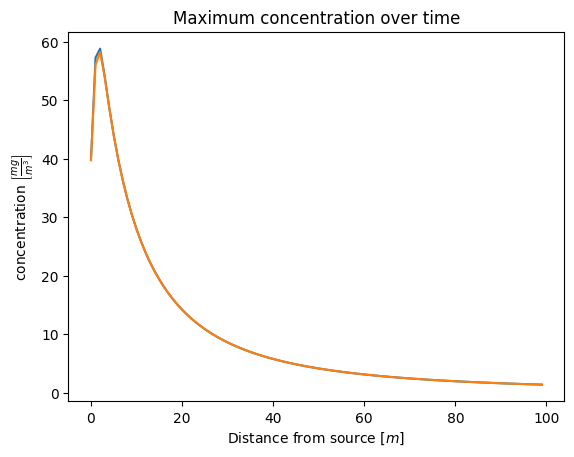

In [154]:
plt.plot(x_array, conc_vals_cont)
plt.plot(x_array, conc_vals_cont_noerf)
plt.xlabel("Distance from source $[m]$")
plt.ylabel(r"concentration $\left[\frac{mg}{m^3}\right]$")
plt.title(r"Maximum concentration over time")

## Concentration over time for a fixed point

Text(0.5, 1.0, 'Receptor at $x=30[m]$, $y=0[m]$, $z=10[m]$')

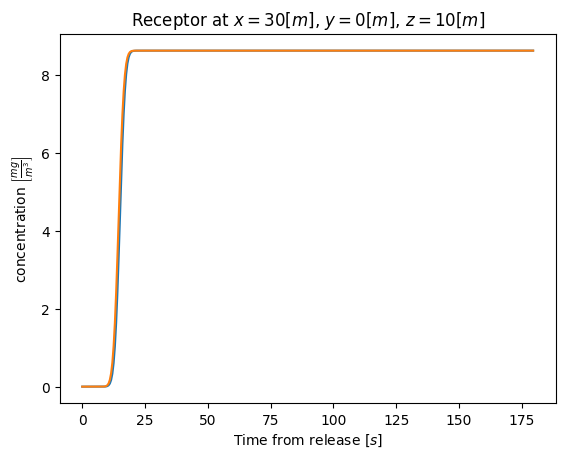

In [155]:
x=30; y=0; z=10;
conc_cont_t = C_cont.sel(x=x,y=y,z=z, method="nearest")
conc_cont_t_noerf = C_cont_NoErf.sel(x=x,y=y,z=z, method="nearest")

time_array = conc_cont_t.squeeze().time
plt.plot(time_array, conc_cont_t)
plt.plot(time_array, conc_cont_t_noerf)
plt.xlabel("Time from release $[s]$")
plt.ylabel(r"concentration $\left[\frac{mg}{m^3}\right]$")
plt.title(f"Receptor at $x={x}[m]$, $y={y}[m]$, $z={z}[m]$")

## Dosage

In [156]:
x=30; y=0; z=10;
dos_x_cont_lastTime_noerf = D_cont_NoErf.sel(y=y,z=z, time=D_cont_NoErf.time[-1])
dos_x_cont_lastTime_doublenoerf = D_cont_doubleNoErf.sel(y=y,z=z, time=D_cont_doubleNoErf.time[-1])
x_array = dos_x_cont_lastTime_noerf.squeeze().x
t_array = dos_t.squeeze().time

Text(0.5, 1.0, 'Maximum Dosage over time')

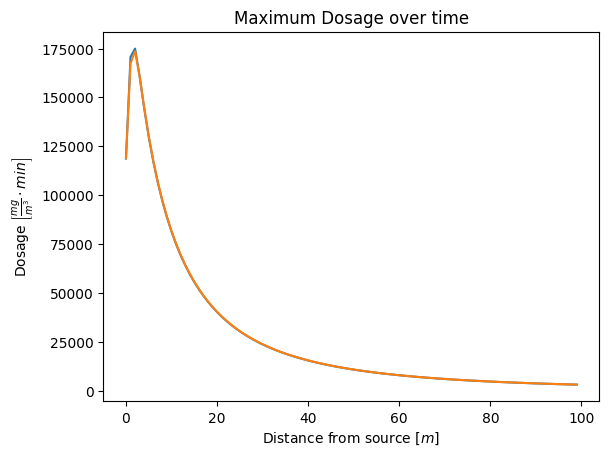

In [157]:
plt.plot(x_array, dos_x_cont_lastTime_noerf)
plt.plot(x_array, dos_x_cont_lastTime_doublenoerf)
plt.xlabel("Distance from source $[m]$")
plt.ylabel(r"Dosage $\left[\frac{mg}{m^3}\cdot min\right]$")
plt.title(r"Maximum Dosage over time")

Text(0.5, 1.0, 'Receptor at $x=30[m]$, $y=0[m]$, $z=10[m]$')

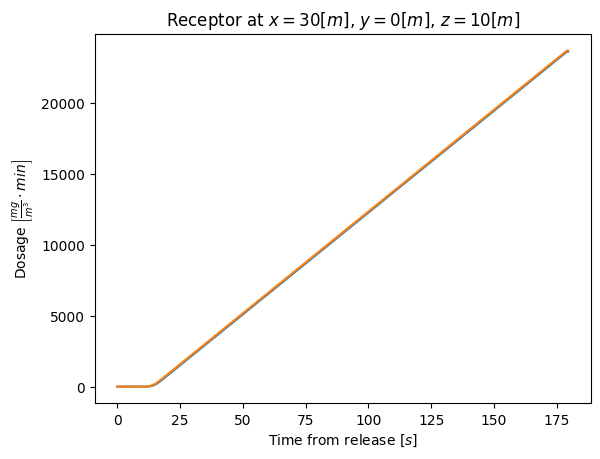

In [158]:
dos_t_noerf = D_cont_NoErf.sel(x=x,y=y,z=z)
dos_t_doublenoerf = D_cont_doubleNoErf.sel(x=x,y=y,z=z)
plt.plot(t_array, dos_t_noerf)
plt.plot(t_array, dos_t_doublenoerf)
plt.xlabel("Time from release $[s]$")
plt.ylabel(r"Dosage $\left[\frac{mg}{m^3}\cdot min\right]$")
plt.title(f"Receptor at $x={x}[m]$, $y={y}[m]$, $z={z}[m]$")

In [7]:
min_x = 199
D_NoERF_new = D_NoERF.sel(x=slice(min_x, None))
D_new = D.sel(x=slice(min_x, None))

In [8]:
dos_x = D.sel(y=0,z=12, method="nearest").max(dim="time")
dos_x_noerf = D_NoERF.sel(y=0,z=12, method="nearest").max(dim="time")

dos_x_lastTime = D.sel(y=0,z=12, time=D.time[-1])
dos_x_lastTime_noerf = D_NoERF.sel(y=0,z=12, time=D_NoERF.time[-1])

x = 50
dos_t = D.sel(x=x,y=0,z=10)
dos_t_noerf = D_NoERF.sel(x=x,y=0,z=10)

x_array = dos_x.squeeze().x
t_array = dos_t.squeeze().time
dos_vals = dos_x.squeeze().values

(0.0, 50.0)

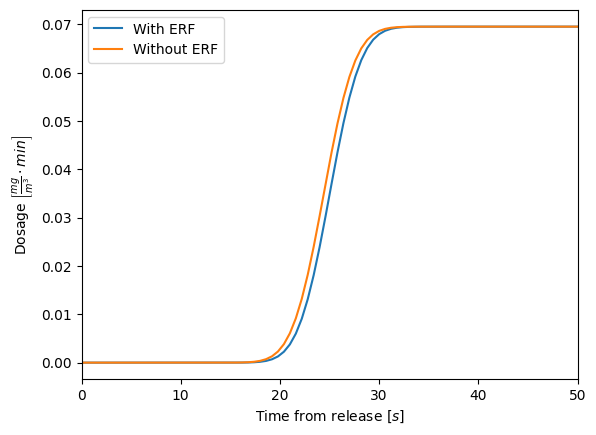

In [9]:
plt.plot(t_array, dos_t, label = "With ERF")
plt.plot(t_array, dos_t_noerf, label = "Without ERF")
# plt.plot(x_array, dos_x_lastTime)
plt.xlabel("Time from release $[s]$")
plt.ylabel(r"Dosage $\left[\frac{mg}{m^3}\cdot min\right]$")
plt.legend()
plt.xlim(0,50)